In [1]:
#Import Neccesary Libraries
%load_ext autoreload
%autoreload 2
import numpy as np
import math
import matplotlib as mpl
import matplotlib.pyplot as PP
import Delta_Height
import xarray as xr
import Cloud_Index
import datetime as dt

In [2]:
#Function Definition
def Fog_Formation(ptop, kz, ps, ta, clw, threshold = 5e-5, height_threshold = 400): #(Height_Threshold in meters)
    """This function will extract REGcm output data to determine whether their is coastal fog present at a particular height in the model.


        Inputs:
        _______
        
        
        ptop = Air Pressure at "top" of RegCM
        
        kz = "Sigma at layer midpoints"
        
        ps = Air Pressure near Earth's surface
        
        ta = Air temperature
        
        clw = Mass fraction of cloud liquid water content
        
        threshold = a defined threshold where index position of RegCM is printed given cloud water content pr (clw) excceeds this defined threshold. 
        
        height_threshold = If height is below defined threshold, fog formation is possible in the atmosphere. 
        
        
        
        Output:
        _______
        
        
        Fog: fog present will output a value of [1], No fog present will display a value of [0].



    """

#Outputs and prints a value of (1) if their is fog present, and (0) if there is no fog present. 

    p = ptop + kz*(ps-ptop)
    height_array = Delta_Height.calculated_height(p, ta)        #An array of heights in between layers of the REGcm.
    cl_in = Cloud_Index.cloud_index(clw, threshold)             #Index position of water content values that exceed a defined threshold.
    Height_at_Index = height_array[cl_in]                       #A scalar value of height at the index position in which REGcm water content values exceed the defined threshold.  
    
    if Height_at_Index <= height_threshold:
        Fog_Presence = 1 
    else: 
        Fog_Presence = 0    
    
    return Fog_Presence
   

In [3]:
#Extracts RegCM Output data from the date defined directly below

file_date = dt.datetime(2000, 5, 11, 3)

#pulling up the 'base state' files with the variables ATM and RAD

#For Example:

#ReGCM_ATM_File = "/N/project/obrienta_startup/2020_summer_fog_project/twburkle/1950fog/output/1950fog_ATM.*****.nc"

ReGCM_ATM_File = f"/N/project/obrienta_startup/2020_summer_fog_project/twburkle/1950fog/output/1950fog_ATM.{file_date.year:04}{file_date.month:02}0100.nc"

#Converting RegCM variables into an xarray dataset. 
atm_xr1 = xr.open_dataset(ReGCM_ATM_File)

print(ReGCM_ATM_File)

/N/project/obrienta_startup/2020_summer_fog_project/twburkle/1950fog/output/1950fog_ATM.2000050100.nc


In [4]:
atm_xr1

<xarray.Dataset>
Dimensions:  (iy: 93, jx: 93, kz: 30, time: 248)
Coordinates:
  * jx       (jx) float64 -9.2e+05 -9e+05 -8.8e+05 ... 8.8e+05 9e+05 9.2e+05
  * iy       (iy) float64 -9.2e+05 -9e+05 -8.8e+05 ... 8.8e+05 9e+05 9.2e+05
  * kz       (kz) float64 0.025 0.07511 0.1253 0.1755 ... 0.9725 0.9844 0.995
    xlon     (iy, jx) float32 ...
    xlat     (iy, jx) float32 ...
  * time     (time) datetime64[ns] 2000-05-01T03:00:00 ... 2000-06-01
Data variables:
    ptop     float64 ...
    mask     (iy, jx) float32 ...
    topo     (iy, jx) float32 ...
    ps       (time, iy, jx) float32 ...
    ts       (time, iy, jx) float32 ...
    ua       (time, kz, iy, jx) float32 ...
    va       (time, kz, iy, jx) float32 ...
    ta       (time, kz, iy, jx) float32 ...
    omega    (time, kz, iy, jx) float32 ...
    hus      (time, kz, iy, jx) float32 ...
    clw      (time, kz, iy, jx) float32 ...
    rh       (time, kz, iy, jx) float32 ...
    tke      (time, kz, iy, jx) float32 ...
    crs      |S1 ...
Attributes:
    title:                                           ICTP Regional Climatic m...
    institution:                                     ICTP
    source:                                          RegCM Model output file
    executable_date:                                 Jun  9 2020
    Conventions:                                     CF-1.7
    references:                                      http://gforge.ictp.it/gf...
    model_revision:                                  4.8.2-13-gbd63b
    history:                                         2020-07-19 21:51:25 : Cr...
    experiment:                                      1950fog
    projection:                                      LAMCON
    grid_size_in_meters:                             20000.0
    latitude_of_projection_origin:                   37.0
    longitude_of_projection_origin:                  -122.0
    index_of_projection_origin:                      [48. 48.]
    standard_parallel:                               [30. 60.]
    grid_factor:                                     0.0
    landsurface_model:                               bats1e
    model_icbc_data_source:                          NNRP1
    model_sst_data_source:                           ERSST
    boundary_nspgx:                                  12
    boundary_nspgd:                                  12
    boundary_high_nudge:                             3.0
    boundary_medium_nudge:                           2.0
    boundary_low_nudge:                              1.0
    boundary_nm:                                     -1.0
    boundary_dm:                                     -1.0
    model_is_restarted:                              Yes
    model_simulation_initial_start:                   1950-01-01 00:00:00 UTC
    model_simulation_start:                           2000-02-01 00:00:00 UTC
    model_simulation_end:                             2001-02-01 00:00:00 UTC
    atmosphere_time_step_in_seconds:                 50.0
    surface_interaction_time_step_in_seconds:        200.0
    convection_time_step_in_seconds:                 300.0
    radiation_scheme_time_step_in_seconds:           1800.0
    absorption_emission_time_step_in_seconds:        64800.0
    dynamical_core:                                  1
    asselin_filter_nu_1:                             0.0625
    asselin_filter_nu_2:                             0.0625
    diffusion_hgt_factor:                            1
    upstream_mode:                                   Yes
    off_centering_max:                               0.25
    stability_enhance:                               Yes
    temperature_extreme_gradient:                    5.0
    vapor_extreme_gradient_fraction:                 0.2
    lateral_boundary_condition_scheme:               5
    semi_lagrangian_advection_scheme:                0
    diffusion_scheme:                                1
    boundary_layer_scheme:                           2
    cumulus_convectio

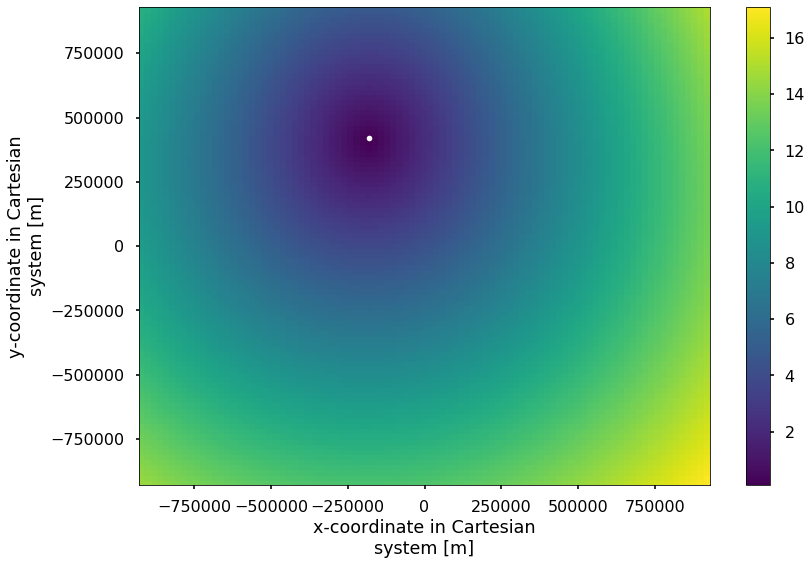

In [5]:
# Using the Lat and Long of Arcata(lat, lon)
lat = 40.8665
lon = -124.0828

# Extracting latitidude array and longitude array values from RegCM
lat2d = atm_xr1.xlat 
lon2d = atm_xr1.xlon

#Calculate the distance to Arcata to each grid point 
degree_distance = np.sqrt((lat - lat2d)**2 + (lon - lon2d)**2)


#Finds the closest index lat/lon to Arcata 
closest_index1d = np.argmin(degree_distance.values.ravel())
iy_min, jx_min = np.unravel_index(closest_index1d, degree_distance.shape)

#Extracts RegCM values at that point
atm_xr1_close = atm_xr1.sel(jx = atm_xr1.jx[jx_min].values, iy = atm_xr1.iy[iy_min].values , time = file_date, kz = slice(None, None, -1)) # reverse the z direction for all variables

#Plot the distance from Arcata to each grid point 
fig,ax = PP.subplots()
degree_distance.plot()
ax.plot(atm_xr1.jx[jx_min].values, atm_xr1.iy[iy_min].values, "w.")
PP.show()

In [6]:
#Calculate Pressure from xarray dataset.  
ptop = atm_xr1_close['ptop']  
kz = atm_xr1_close['kz']
ps = atm_xr1_close['ps']
ta = atm_xr1_close['ta']
clw = atm_xr1_close['clw']

In [7]:
threshold = 5e-5
height_threshold = 400
Fog_Presence = Fog_Formation(ptop.values, kz.values, ps.values, ta.values, clw.values, threshold, height_threshold)

#These are being calculated for validation plot below. 
p = ptop + kz*(ps-ptop)
height_array = Delta_Height.calculated_height(p.values, ta.values)   
cl_in = Cloud_Index.cloud_index(clw.values, threshold)                 
Height_at_Index = height_array[cl_in]   

Text(2.5e-05, 3000, 'Fog_Presence = 1')

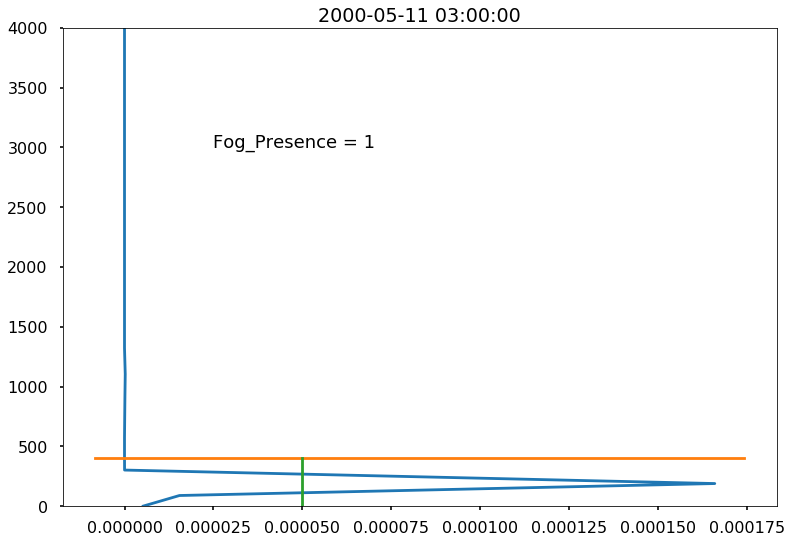

In [8]:
#Graphical test of Fog Function 
fig, ax = PP.subplots()
ax.plot(clw, height_array, label = "Plot of clw vs. Height")
ax.set_ylim(0, 4000)
xlim = ax.get_xlim()

ax.plot(xlim, [height_threshold, height_threshold])
ax.plot([threshold, threshold], [0, height_threshold])
ax.set_title(str(file_date))
ax.text(2.5e-5, 3000, f'Fog_Presence = {Fog_Presence}', fontsize = 18)
